In [11]:
# Initialize Otter
import otter
grader = otter.Notebook("hw1.ipynb")

## Homework #1

*Please edit the cell below to add your full name (first and last) and the full names of any group members that you collaborated with on this assignment.* 

Name: Kaitlyn Huynh

Group Members:   
***

In [12]:
# Set random seed and ensure plots are displayed in the notebook
import numpy as np
np.random.seed(5)
%matplotlib inline

<!-- BEGIN QUESTION -->

**Question 1 (20 points).** In lecture, we considered an outcome from the globe tossing experiment with 6 water and 3 land observations. Suppose the globe tossing data had turned out to be 4 water observations and 11 land observations. **Using a uniform prior**, compute **and plot** the posterior distribution evaluating the posterior distribution for this data using grid sizes of 5, 10, 25, and 50 points. Create plots with separate x- and y-axis to make your visualizations clear. Feel free to use the function (`posterior_grid_approx`) defined in lecture for computing your posterior distribution.

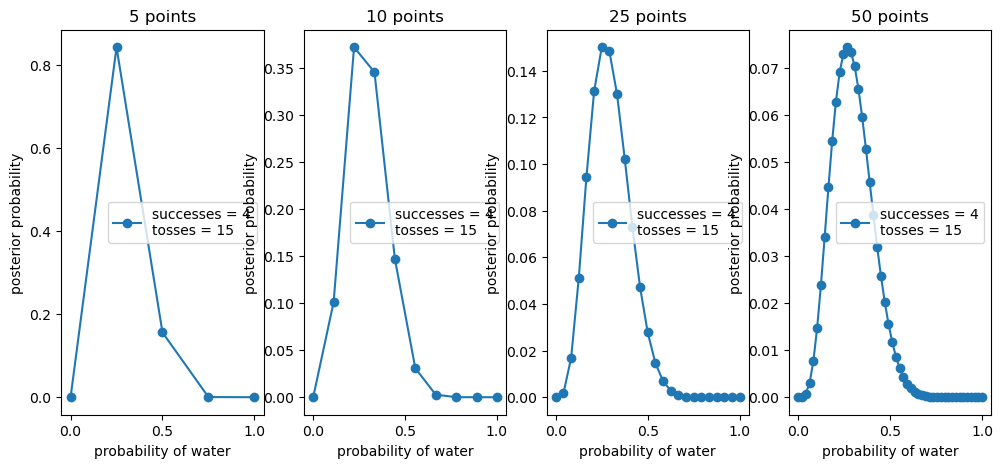

In [13]:
# Write code here
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """"""
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior
    
w, n = 4, 15

_, ax = plt.subplots(1, 4, figsize=(12, 5))

points = (5, 10, 25, 50)
for idx, ps in enumerate(points):
    p_grid, posterior = posterior_grid_approx(ps, w, n)
    ax[idx].plot(p_grid, posterior, "o-", label=f"successes = {w}\ntosses = {n}")
    ax[idx].set_xlabel("probability of water")
    ax[idx].set_ylabel("posterior probability")
    ax[idx].set_title(f"{ps} points")
    ax[idx].legend(loc=0)



Based on your plots, answer the following question:

How has the posterior changed using these observations (4 W, 11 L) relative to the example of this problem from lecture? **Be sure to comment on what the change in the posterior implies for our estimate of the proportion of water on Earth.**  **Limit your response to no more than 2 sentences**

These observations have more land observations than water, so the graphs appear right skewed whereas the graphs in lecture are left skewed. This posterior implies that the likelihood of getting p < 4/15 or p > 4/15 based on (4 W, 11 L) observations decreases, meaning that the chances of observing water on this Earth are lower than the peak at p = 4/15 which is already quite small as well. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2 (12 points).** Now suppose the data are 4 water observations and 2 land observations. Compute the posterior again (for 5, 10, 25, and 50 grid points), but this time use a prior assigning 0 plausibility to values below p = 0.5 and a constant measure of plausibility for values above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water. (You can find example code for how to compute such a prior in the Python code on JupyterHub that corresponds to Chapter 2 of the textbook. Part of the goal of this problem is for you to familiarize yourself with how to access the textbook and the accompanying code.)  

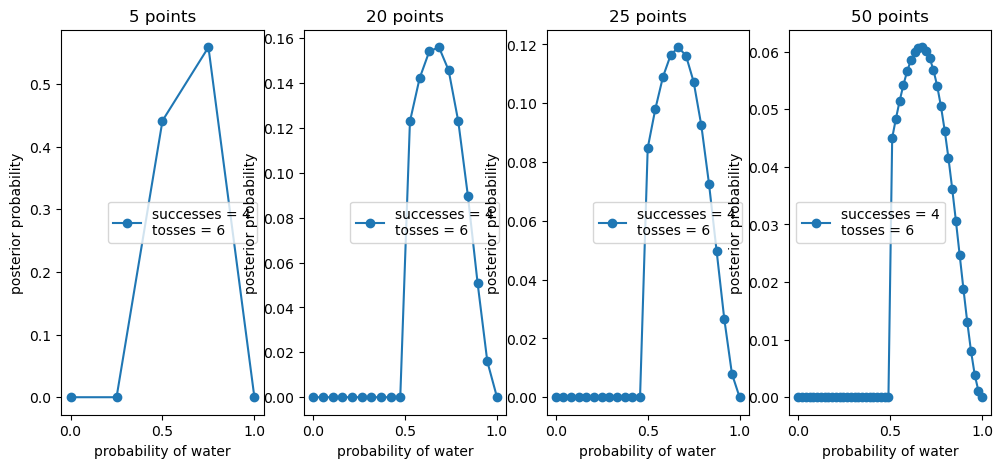

In [14]:
# Write code here
def posterior_grid_approx_assigns(grid_points, success, tosses):
    p_grid = np.linspace(0, 1, grid_points)
    # prior = np.repeat(5, grid_points)
    prior = np.zeros(grid_points) # set all values in grid points to zero
    prior[p_grid >= 0.5] = 1 # all p >= 0.5 are constant, p < 0.5 are zeroes
    
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    unorm_posterior = likelihood * prior
    posterior = unorm_posterior / unorm_posterior.sum()
    return p_grid, posterior
    
w, n = 4, 6
points = (5, 20, 25, 50)
_, ax = plt.subplots(1, len(points), figsize=(12, 5))


for idx, ps in enumerate(points):
    p_grid, posterior = posterior_grid_approx_assigns(ps, w, n)
    ax[idx].plot(p_grid, posterior, "o-", label=f"successes = {w}\ntosses = {n}")
    ax[idx].set_xlabel("probability of water")
    ax[idx].set_ylabel("posterior probability")
    ax[idx].set_title(f"{ps} points")
    ax[idx].legend(loc=0)

Answer the following questions based on your new posterior plots:

**Be sure to explicitly compare the posterior plots from Question 1 to those from this problem when providing your written answers.**

a) How do the grid-approximated posterior distributions compare to those generated in Question 1? **Limit your response to no more than 2 sentences**

The distributions in this graph are left skewed, where values of p with a constant plausibility. The graph in question 1 has a broader range of nonzero density values than graph 2 since no p values were excluded via setting the probability to 0.

b) What would you infer from this outcome (4 water, 2 land) about how much of the Earth is covered by water compared to the example considered in Question 1? *You can disregard the differences in the prior used when answering this question. Just base your answer on the posterior plots.*  **Limit your response to no more than 2 senteces.**

It appears that the most plausible value for p is 0.68. This implies that Earth is likely more covered in water than not with p = 0.68 being likely to observe given observations of 4 W and 2 L.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3 (18 points)**. For the posterior distribution from Question 2 (using a **grid of 100 points**) compute 89% percentile and 89% Highest Posterior Density (HPD) intervals for the posterior predictive distribution. (Example code for computing these intervals can be found within Chapter 3's Python code for *Statistical Rethinking, 2nd Edition* available through the JupyterHub site for this course. Again, one goal of this question is to get you familiar with accessing the textbook and associated Python code). **Sample 1000 points** from the posterior distribution to construct the posterior predictive distribution.

89 percentile interval: [0.52525253 0.86868687]
89% HPDI: [0.50505051 0.83838384]


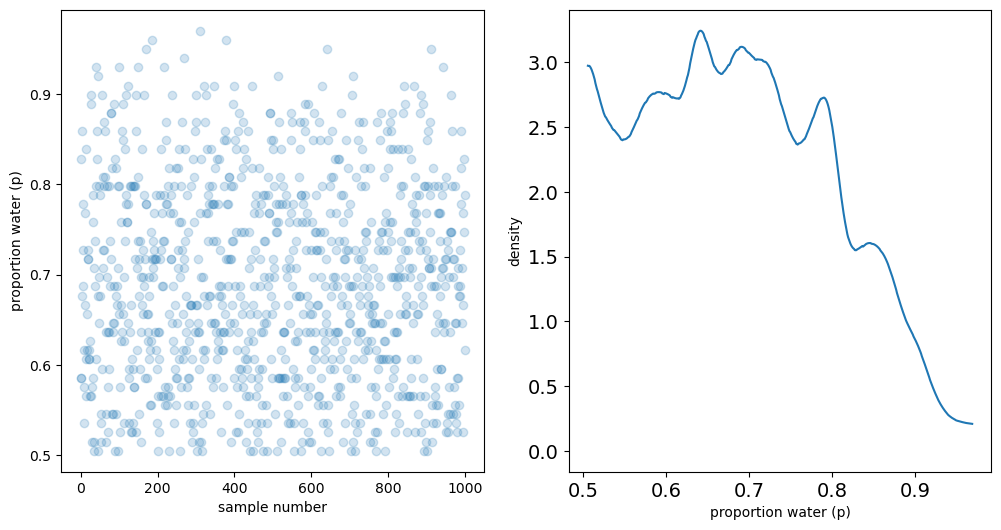

In [15]:
# Write code here
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

def posterior_grid_approx_plausible_assigns(grid_points, success, tosses):
    """"""
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

p_grid, posterior = posterior_grid_approx_plausible_assigns(grid_points=100, success=4, tosses=6)
samples = np.random.choice(p_grid, p=posterior, size=int(1e3), replace=True)
# print(np.percentile(samples, 89))
# print(samples)
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")

az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");
print("89 percentile interval:", np.percentile(samples, [5.5, 94.5]))
print("89% HPDI:", az.hdi(samples, hdi_prob=0.89))

Answer the following questions: 

a) Between the 89% percentile and 89% HPD intervals of the posterior predictive distribution, which is wider? Why? *You'll want to consider what these intervals represent with respect to the posterior predictive distribution for which they are computed.* **Limit your response to no more than 3 sentences.**


The HPD interval is created to capture the most narrow region with 89% of the probability. The 89% percentile is wider because it is considering the percentile of 5.5% removed off of each side, therefore it covers more area than the HPD interval. 

b) If you had only the information in these intervals (instead of the full posterior distribution), what might you misunderstand about the shape of the posterior distribution? **Limit your response to no more than 3 sentences.**

The shape of the interval for the 89th percentile will capture 89% of the data with the same amount removed from each side, so it will take on whichever shape the distribution has. For HPDI, it will only capture the region with the highest density and that could be concentrated in a certain area of the graph. Therefore, there may be misunderstandings around how the data is actually distributed.

In [16]:
grader.check("q3")

q3 results: All test cases passed!

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Before attempting to export your work for submission follow this process: First, make sure you have run all cells in your notebook **in order**. Then, **save your notebook**. Finally, run the export cell below. This sequence of actions will ensure that all code/output/plots appear in the generated PDF. **Only the PDF** will be evaluated for grading purposes.  When executed, the cell below will generate a zip file for you to submit. After making your submission on Gradescope, be sure to **review your submitted PDF** to ensure that it contains all of the work that you want evaluated.

In [17]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q3 results: All test cases passed!
